I want to check whether or not I can overwrite the existing samples to include the SF branches

In [4]:
sample_loc = '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag'
feyn_loc = '/eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output'

sf_file = 'NMSSM/btagsf/NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M/ntuple.root'
sf_feyn = 'sf_NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M.root'

og_file = 'NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M/ntuple.root'
og_feyn = 'NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M.root'

og = SixB(f'{sample_loc}/{og_file}', gnn_model = f'{feyn_loc}/{og_feyn}')
sf = SixB(f'{sample_loc}/{sf_file}', gnn_model = f'{feyn_loc}/{sf_feyn}')

[13:16:42] Loading Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M/ntuple.root...      ]8;id=199737;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=934002;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#129\129]8;;\

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018


[13:17:10] Loading                                                                                    ]8;id=419368;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=258276;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#235\235]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/NMSSM_XY              
           H_YToHH_6b_MX_700_MY_400_2M.root...                                                                     

Calculating SF correction factors
REGION: concentric


[13:17:35] Loading                                                                                    ]8;id=221246;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=39855;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#129\129]8;;\
           Summer2018UL/maxbtag/NMSSM/btagsf/NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M/ntuple.root...                    

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018


[13:18:04] Loading                                                                                    ]8;id=971751;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=681776;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#235\235]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/sf_NMSSM              
           _XYH_YToHH_6b_MX_700_MY_400_2M.root...                                                                  

Calculating SF correction factors
REGION: concentric


In [8]:
print(len(og.n_jet), len(sf.n_jet))
print(og.nevents, sf.nevents)

1032729 1104047
1032729 1104047


In [12]:
ak.min(og.jet_btag[:,0]), ak.min(sf.jet_btag[:,0])

(0.11401367, 0.08325195)

In [13]:
ak.min(ak.sort(og.jet_pt)[:,0]), ak.min(ak.sort(sf.jet_pt)[:,0])

(20.000015, 20.000015)

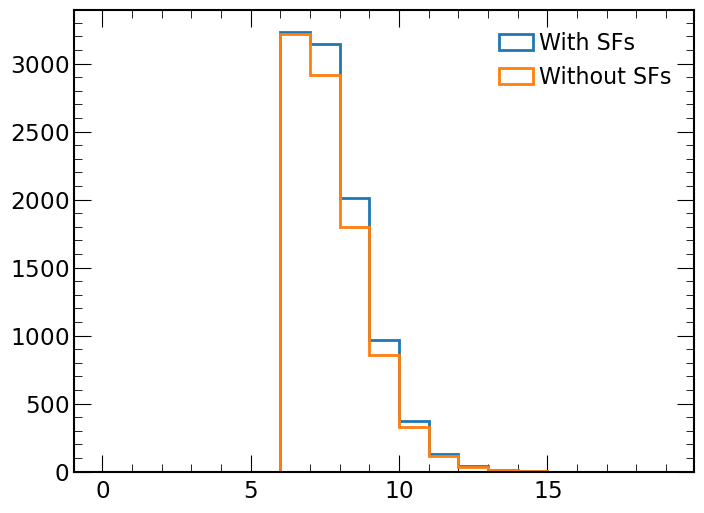

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

n_sf = Hist(sf.n_jet, bins=np.arange(20), ax=ax, weights=sf.scale, label='With SFs')
n_og = Hist(og.n_jet, bins=np.arange(20), ax=ax, weights=og.scale, label='Without SFs')

ax.legend()

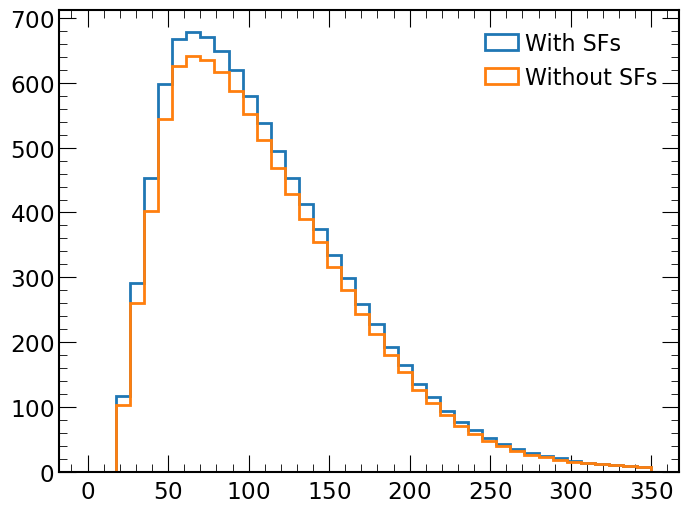

In [6]:
fig, ax = plt.subplots(figsize=(8,6))

n_sf = Hist(sf.jet_pt[:,0], bins=np.linspace(0,350,41), ax=ax, weights=sf.scale, label='With SFs')
n_og = Hist(og.jet_pt[:,0], bins=np.linspace(0,350,41), ax=ax, weights=og.scale, label='Without SFs')

ax.legend()